# 1. Dependecies and Datapreprocessing

In [1]:
!pip install tensorflow-gpu tensorflow stable-baselines3 gym-anytrading gym finta

You should consider upgrading via the 'C:\python_work\python.exe -m pip install --upgrade pip' command.


In [2]:
# Gym
import gym
import gym_anytrading

# Stable baselines
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#custom Indicator
from gym_anytrading.envs import StocksEnv
from finta import TA

C:\python_work\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [3]:
df = pd.read_csv("data/BTC_USDT.csv")

In [4]:
df.head()

,date,Open,High,Low,Close,volume
0,2022-02-04 00:00:00,37311.98,37343.77,37174.33,37204.94,582.36530
1,2022-02-03 23:00:00,36933.16,37387.00,36865.49,37311.61,1386.22097
2,2022-02-03 22:00:00,36949.00,37016.42,36800.01,36933.16,705.28717
3,2022-02-03 21:00:00,36367.43,37050.00,36357.87,36948.99,1911.35564
4,2022-02-03 20:00:00,36551.71,36644.05,36270.00,36367.40,1199.79905


In [5]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
df.set_index("date", inplace=True)

In [7]:
df.head()

,Open,High,Low,Close,volume
date,,,,,
2022-02-04 00:00:00,37311.98,37343.77,37174.33,37204.94,582.36530
2022-02-03 23:00:00,36933.16,37387.00,36865.49,37311.61,1386.22097
2022-02-03 22:00:00,36949.00,37016.42,36800.01,36933.16,705.28717
2022-02-03 21:00:00,36367.43,37050.00,36357.87,36948.99,1911.35564
2022-02-03 20:00:00,36551.71,36644.05,36270.00,36367.40,1199.79905


In [8]:
df = df.rename(columns={"volume":"Volume"})

In [9]:
df = df.sort_index()

In [10]:
df.head()

,Open,High,Low,Close,Volume
date,,,,,
2017-08-17 04:00:00,16199.91,16199.91,4261.32,4308.83,44.5100
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.2300
2017-08-17 06:00:00,4315.32,4345.45,4309.37,4324.35,7.2300
2017-08-17 07:00:00,4324.35,4349.99,4287.41,4349.99,4.4400
2017-08-17 08:00:00,4349.99,4377.85,4333.32,4360.69,0.9499


# 2. Custom indicator

In [11]:
df["RSI"] = TA.RSI(df)
df["VWAP"] = TA.VWAP(df)
df["SMA"] = TA.SMA(df, 24)
df.fillna(0, inplace=True)

In [12]:
df.head(30)

,Open,High,Low,Close,Volume,RSI,VWAP,SMA
date,,,,,,,,
2017-08-17 04:00:00,16199.91,16199.91,4261.32,4308.83,44.5100,0.000000,8256.686667,0.000000
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.2300,100.000000,6903.868950,0.000000
2017-08-17 06:00:00,4315.32,4345.45,4309.37,4324.35,7.2300,100.000000,6655.300552,0.000000
2017-08-17 07:00:00,4324.35,4349.99,4287.41,4349.99,4.4400,100.000000,6525.238881,0.000000
2017-08-17 08:00:00,4349.99,4377.85,4333.32,4360.69,0.9499,100.000000,6499.612446,0.000000
2017-08-17 09:00:00,4360.69,4445.78,4360.00,4444.00,10.7600,100.000000,6253.636697,0.000000
2017-08-17 10:00:00,4444.00,4470.00,4399.81,4460.00,23.9400,100.000000,5876.961776,0.000000
2017-08-17 11:00:00,4460.00,4485.39,4427.30,4427.30,27.0200,79.226837,5604.955222,0.000000
2017-08-17 12:00:00,4427.30,4449.56,4411.00,4411.00,23.0300,71.278344,5440.211761,0.000000


### 2.1.4 Create New Environments

In [13]:
#parameter
window_size = 5

In [14]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume', 'RSI','SMA', 'VWAP']].to_numpy()[start:end]
    return prices, signal_features

In [15]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=window_size, frame_bound=(24,124))

In [16]:
env2.signal_features

array([[4.28082000e+03, 8.12900000e+01, 4.09648682e+01, 0.00000000e+00,
        4.56823413e+03],
       [4.22876000e+03, 7.87400000e+01, 4.12291903e+01, 0.00000000e+00,
        4.54256057e+03],
       [4.13461000e+03, 7.23200000e+01, 3.60776203e+01, 0.00000000e+00,
        4.51786687e+03],
       [4.23400000e+03, 5.40700000e+01, 4.05488688e+01, 0.00000000e+00,
        4.50420845e+03],
       [4.23400000e+03, 6.34800000e+01, 4.48423242e+01, 4.34770667e+03,
        4.49065274e+03],
       [4.23443000e+03, 5.06900000e+01, 4.42224126e+01, 4.34683542e+03,
        4.48063308e+03],
       [4.25004000e+03, 6.40000000e+01, 4.86108349e+01, 4.34676208e+03,
        4.47084847e+03],
       [4.24775000e+03, 6.39500000e+01, 4.36878306e+01, 4.34489167e+03,
        4.46104831e+03],
       [4.27048000e+03, 6.89200000e+01, 4.71987900e+01, 4.34281917e+03,
        4.45211109e+03],
       [4.25985000e+03, 7.38300000e+01, 4.46711513e+01, 4.33957083e+03,
        4.44331211e+03],
       [4.26533000e+03, 4.5640

# 3. Build Environment and Train

In [17]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [18]:
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2397 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1579         |
|    iterations           | 2            |
|    time_elapsed         | 2            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0015274625 |
|    clip_fraction        | 0.0617       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | 2e-05        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.17e+04     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00283     |
|    value_loss           | 3.63e+04     |
------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 1264          |
|    iterations           | 13            |
|    time_elapsed         | 21            |
|    total_timesteps      | 26624         |
| train/                  |               |
|    approx_kl            | 0.00059502915 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.362        |
|    explained_variance   | 3.93e-06      |
|    learning_rate        | 0.0003        |
|    loss                 | 7.18e+03      |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000704     |
|    value_loss           | 1.46e+04      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1262         |
|    iterations           | 14           |
|    time_elapsed         | 22      

------------------------------------------
| time/                   |              |
|    fps                  | 1249         |
|    iterations           | 24           |
|    time_elapsed         | 39           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0038629393 |
|    clip_fraction        | 0.0157       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.392       |
|    explained_variance   | -2.38e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 5.72e+03     |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00012     |
|    value_loss           | 1.43e+04     |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1248          |
|    iterations           | 25            |
|    time_elapsed         | 41            |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 1235         |
|    iterations           | 35           |
|    time_elapsed         | 58           |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0018082452 |
|    clip_fraction        | 0.0232       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.283       |
|    explained_variance   | -2.38e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 7.39e+03     |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00404     |
|    value_loss           | 1.6e+04      |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1233          |
|    iterations           | 36            |
|    time_elapsed         | 59            |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 1228         |
|    iterations           | 46           |
|    time_elapsed         | 76           |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0016506675 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.42        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 8.93e+03     |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.00147     |
|    value_loss           | 1.88e+04     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1228         |
|    iterations           | 47           |
|    time_elapsed         | 78           |
|    total_

# 4. Evaluation

In [19]:
env = MyCustomEnv(df=df, window_size=window_size, frame_bound=(5,100))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 670.6999999999989, 'total_profit': 0.8113490363206123, 'position': 0}


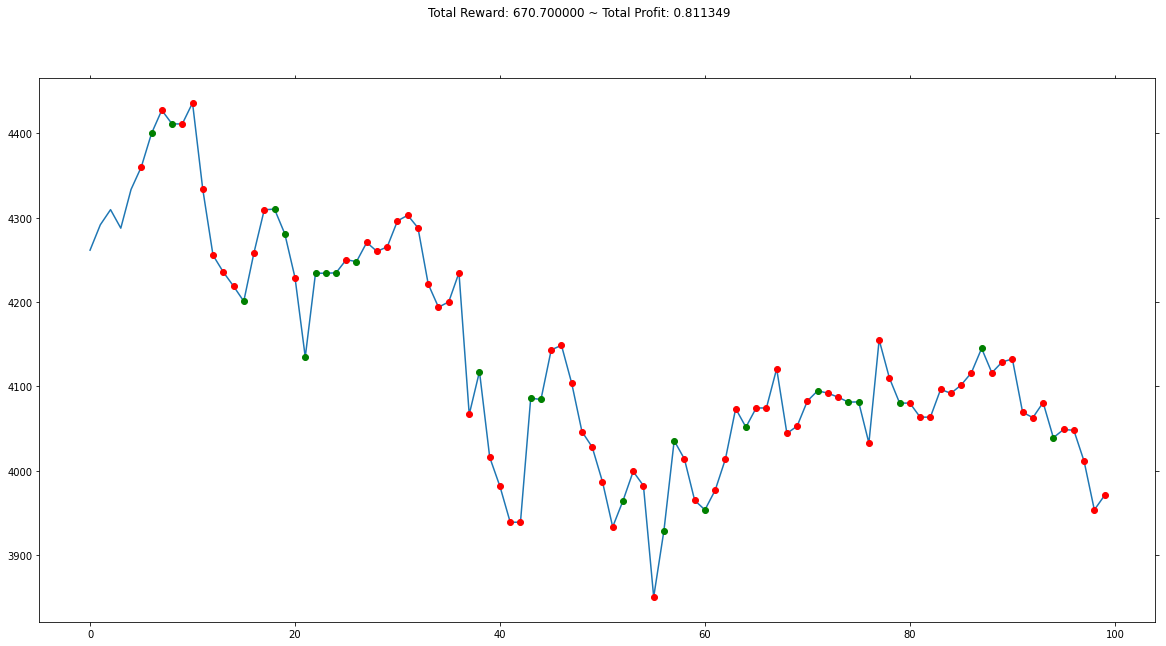

In [20]:
plt.figure(figsize=(20,10))
plt.cla()
env.render_all()
plt.show()